In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import requests
from io import BytesIO
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
import community
import seaborn as sns

In [2]:
results_path = '/sise/eliorsu-group/yuvalgor/courses/Data-mining-in-Big-Data/results/CLIPCatBoostPricePrediction_analysis_20250118_1002.csv'
df = pd.read_csv(results_path)

In [3]:
# Sort by potential profit (largest price difference first)
best_deals = df.head(10) 

In [4]:
print("\nTop 10 Potentially Undervalued Products:")
print("----------------------------------------")
for idx, row in best_deals.iterrows():
    print(f"\nProduct: {row['title']}")
    print(f"Category: {row['mainCategory']}")
    print(f"Current Price: ${row['actual_price']:.2f}")
    print(f"Predicted Price: ${row['predicted_price']:.2f}")
    print(f"Potential Profit: ${abs(row['price_difference']):.2f} ({abs(row['price_difference_pct']):.1f}%)")
    print("-" * 50)


Top 10 Potentially Undervalued Products:
----------------------------------------

Product: signed tiffany & co. 750 18k gold paloma picasso love & kisses xxxooo brooch
Category: Jewelry & Gemstones
Current Price: $180.99
Predicted Price: $1021.34
Potential Profit: $840.35 (82.3%)
--------------------------------------------------

Product: 18k yellow gold 1.7mm wide gucci/mariner link bracelet 7" long
Category: Jewelry & Gemstones
Current Price: $126.00
Predicted Price: $555.95
Potential Profit: $429.95 (77.3%)
--------------------------------------------------

Product: 10k yellow gold wedding ring size 6 1.2g
Category: Jewelry & Gemstones
Current Price: $29.99
Predicted Price: $370.13
Potential Profit: $340.14 (91.9%)
--------------------------------------------------

Product: 5.32 grams of marked and tested 18k yellow gold diamond bracelet
Category: Jewelry & Gemstones
Current Price: $201.00
Predicted Price: $506.87
Potential Profit: $305.87 (60.3%)
------------------------------

/tmp/ipykernel_519642/1659551395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_deals.head(5),


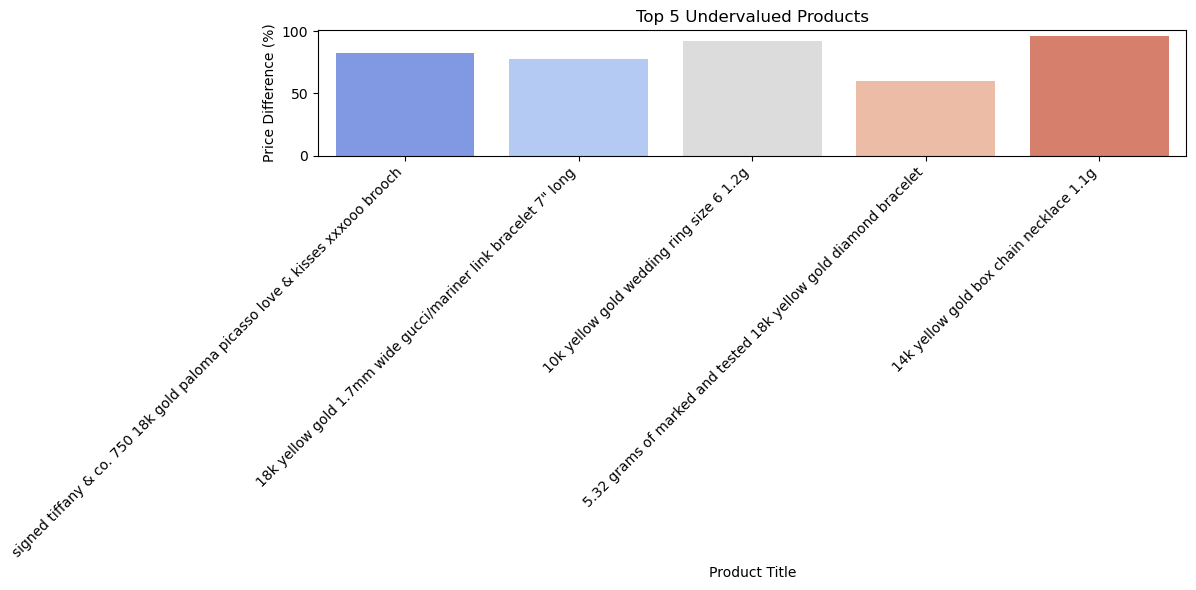

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=best_deals.head(5), 
            x='title', 
            y='price_difference_pct',
            palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Undervalued Products')
plt.ylabel('Price Difference (%)')
plt.xlabel('Product Title')
plt.tight_layout()
plt.show()



Top 10 Most Promising Products:

Product: signed tiffany & co. 750 18k gold paloma picasso love & kisses xxxooo brooch
Current Price: $180.99
Predicted Price: $1021.34
Potential Profit: $840.35
Category: Jewelry & Gemstones
Location: GA

Description:
tiffany & co. 18k gold brooch material & karats (if applicable): gold 18k weight: 4.26 grams condition: good - shows some sign of wear


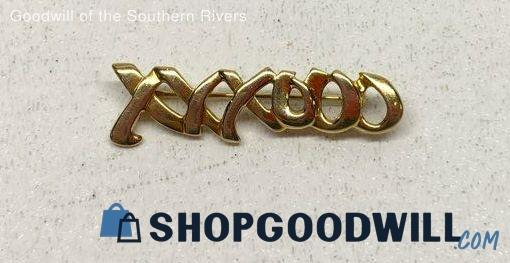

----------------------------------------------------------------------

Product: 18k yellow gold 1.7mm wide gucci/mariner link bracelet 7" long
Current Price: $126.00
Predicted Price: $555.95
Potential Profit: $429.95
Category: Jewelry & Gemstones
Location: MD

Description:
18k yellow gold 1.7mm wide gucci/mariner link bracelet approximate measurements: 7" long x 1.7mm wide markings: 750 + italian hallmarks weight: .8 grams condition: no visible damage, only minor scratc...


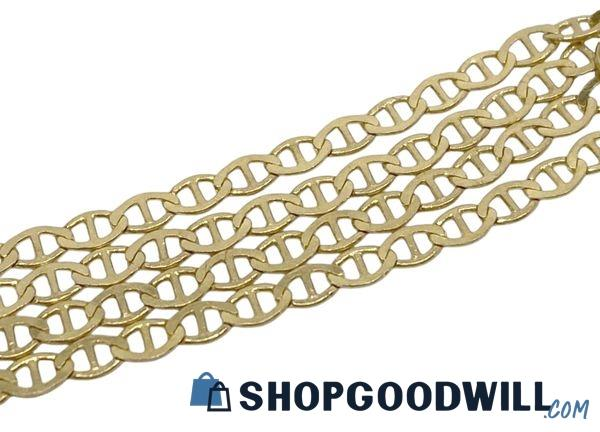

----------------------------------------------------------------------

Product: 10k yellow gold wedding ring size 6 1.2g
Current Price: $29.99
Predicted Price: $370.13
Potential Profit: $340.14
Category: Jewelry & Gemstones
Location: VA

Description:
10k yellow gold wedding ring size 6 1.2g condition: pre owned


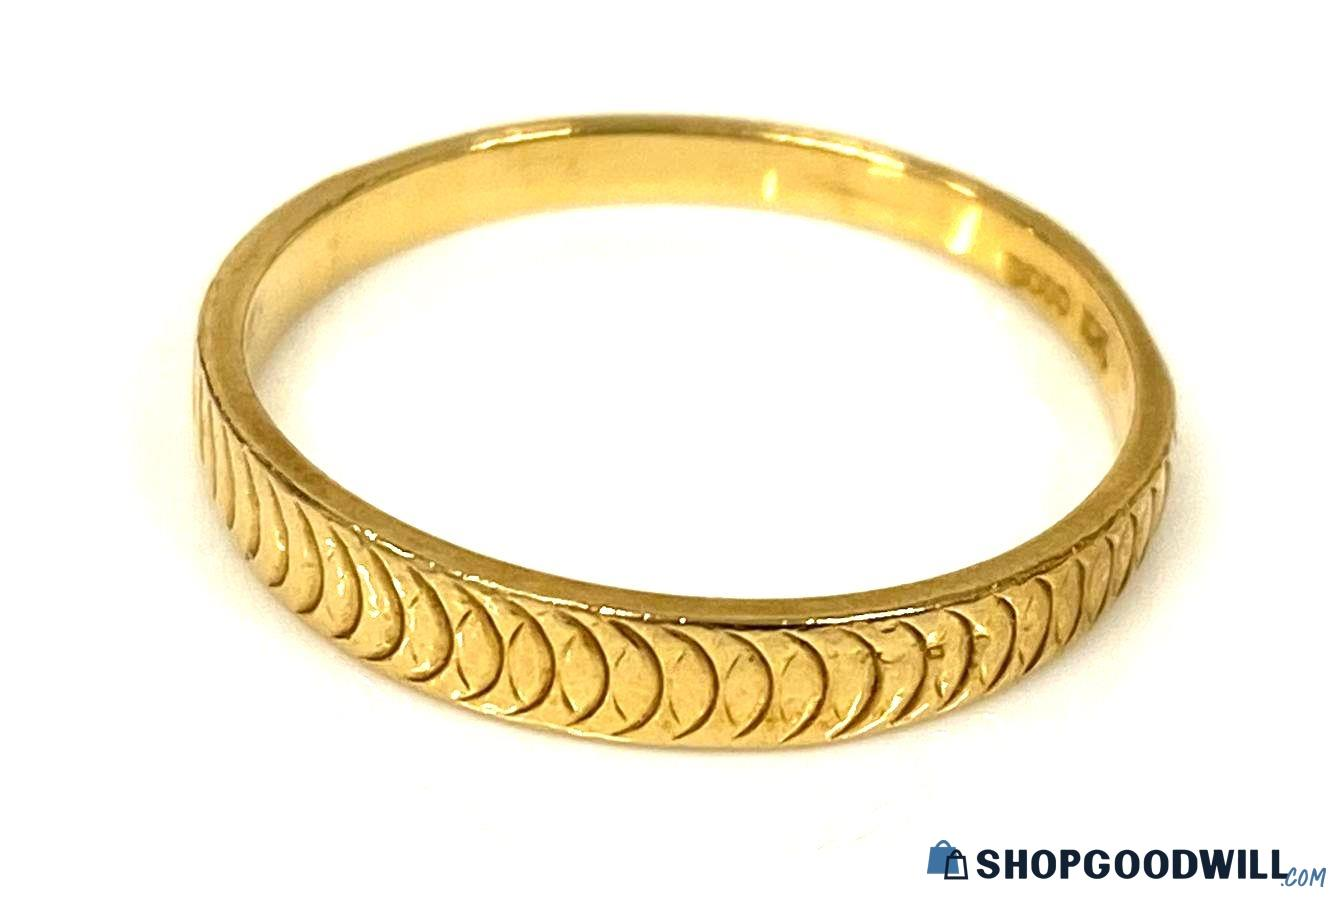

----------------------------------------------------------------------

Product: 5.32 grams of marked and tested 18k yellow gold diamond bracelet
Current Price: $201.00
Predicted Price: $506.87
Potential Profit: $305.87
Category: Jewelry & Gemstones
Location: OH

Description:
brands/markings:5.32 grams of marked and tested 18k yellow gold diamond bracelet actual weight (grams:): 5.32 grams reaction to magnet: no condition: appears new gold testing: yes 18k yellow gold gem ...


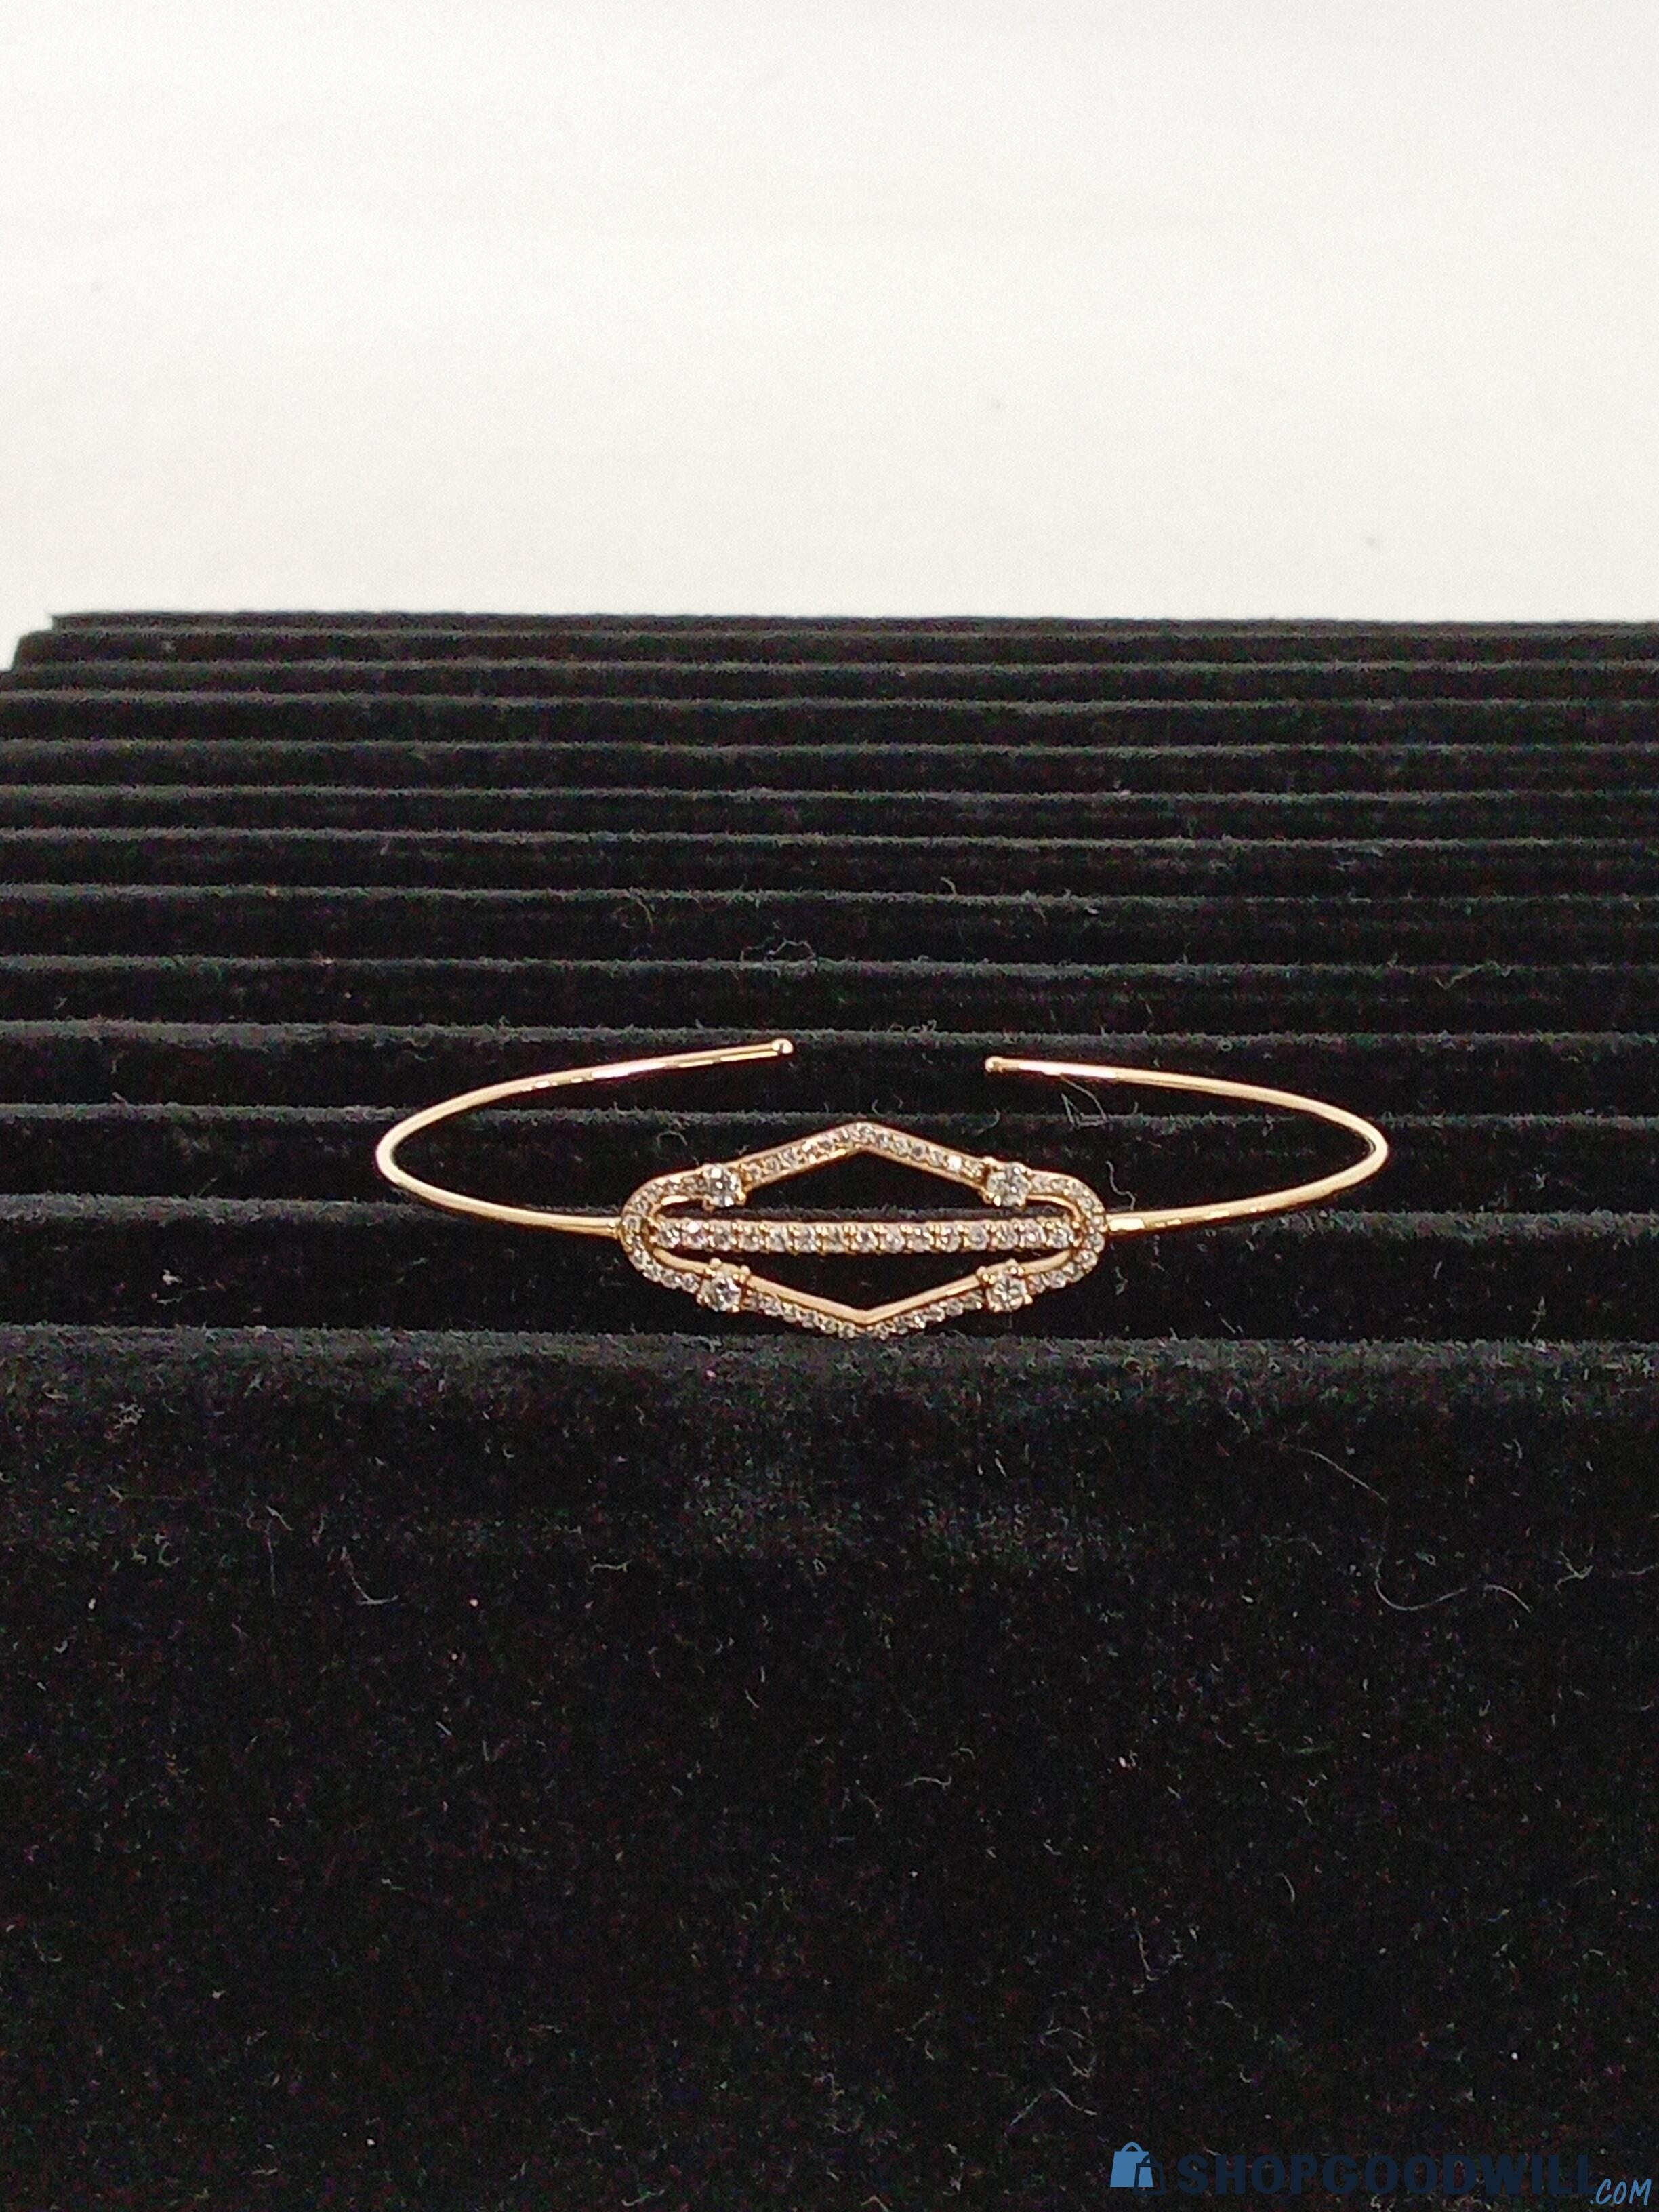

----------------------------------------------------------------------

Product: 14k yellow gold box chain necklace 1.1g
Current Price: $12.99
Predicted Price: $313.09
Potential Profit: $300.10
Category: Jewelry & Gemstones
Location: AZ

Description:
tested: yes material: gold gold color: yellow karats: 14k markings: 14kt total weight: 1.1 grams length: 11.25 inches condition: fair - shows signs of wear. authentication performed on this lot: unmar...


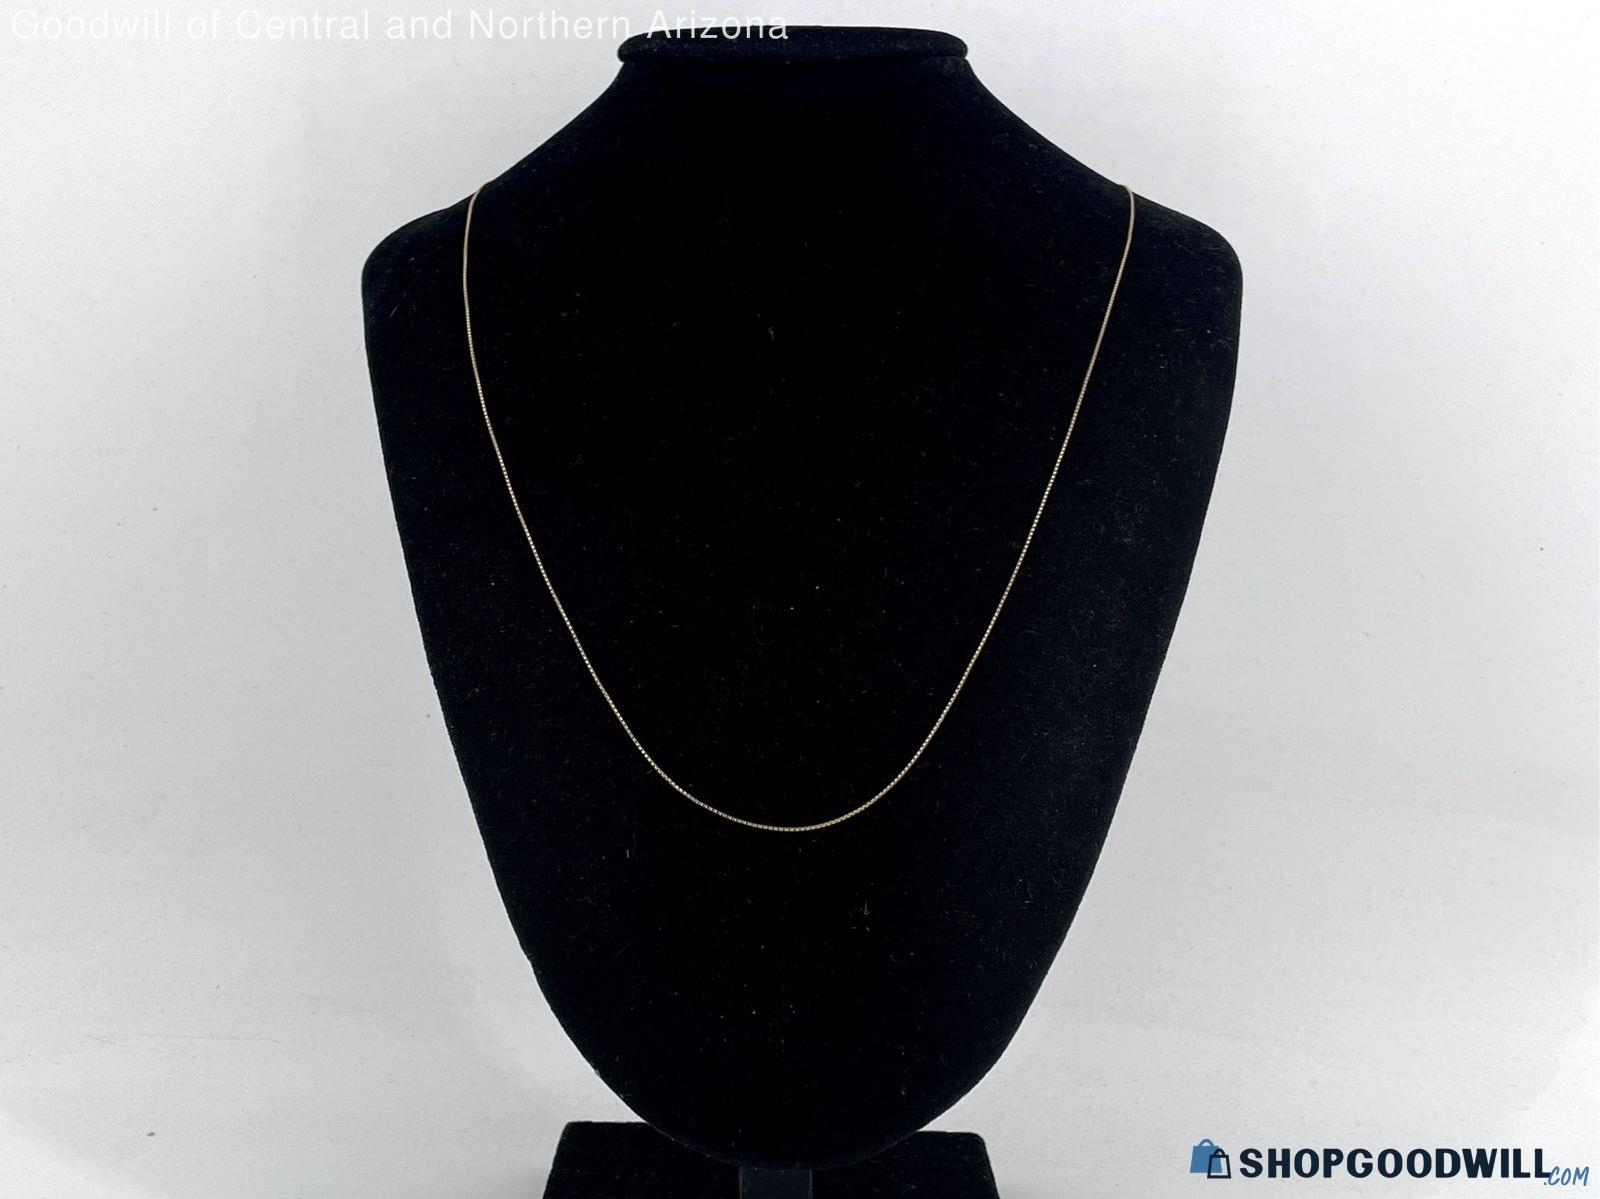

----------------------------------------------------------------------

Product: 14k yellow gold 6.75in heart link chain bracelet turkey 4.2g
Current Price: $31.00
Predicted Price: $318.21
Potential Profit: $287.21
Category: Jewelry & Gemstones
Location: OH

Description:
material & karats (if applicable): gold 14k - tested weight(grams): 4.2g condition: good - shows some sign of wear such as light tarnishing, color loss, and surface scratches. length (inches): 6.75in ...


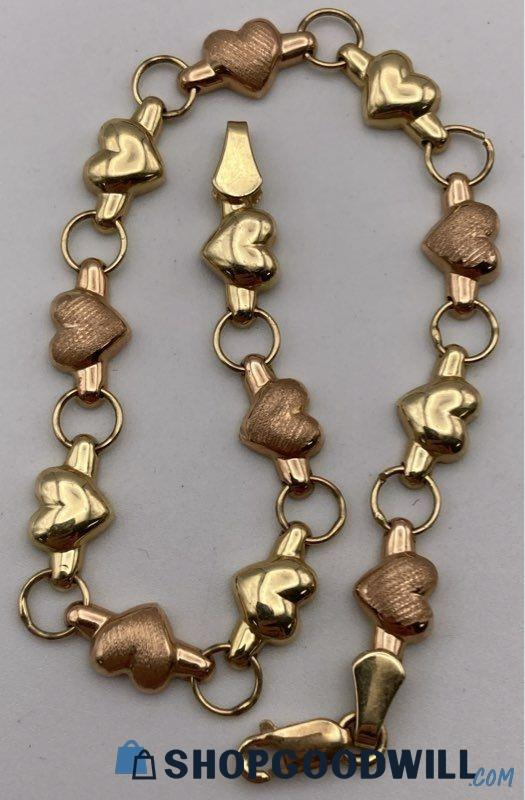

----------------------------------------------------------------------

Product: 3.0g designer vanna k 925 14k gold plated simulated diamond (cz) ring size 7
Current Price: $19.99
Predicted Price: $298.20
Potential Profit: $278.21
Category: Jewelry & Gemstones
Location: OH

Description:
newark ohio goodwill 2 go presents: 3.0g designer vanna k 925 14k gold plated simulated diamond (cz) ring size 7thickness approx 1/8" material/metal: sterling silver; 14k gold plate; cubic zirconia ma...


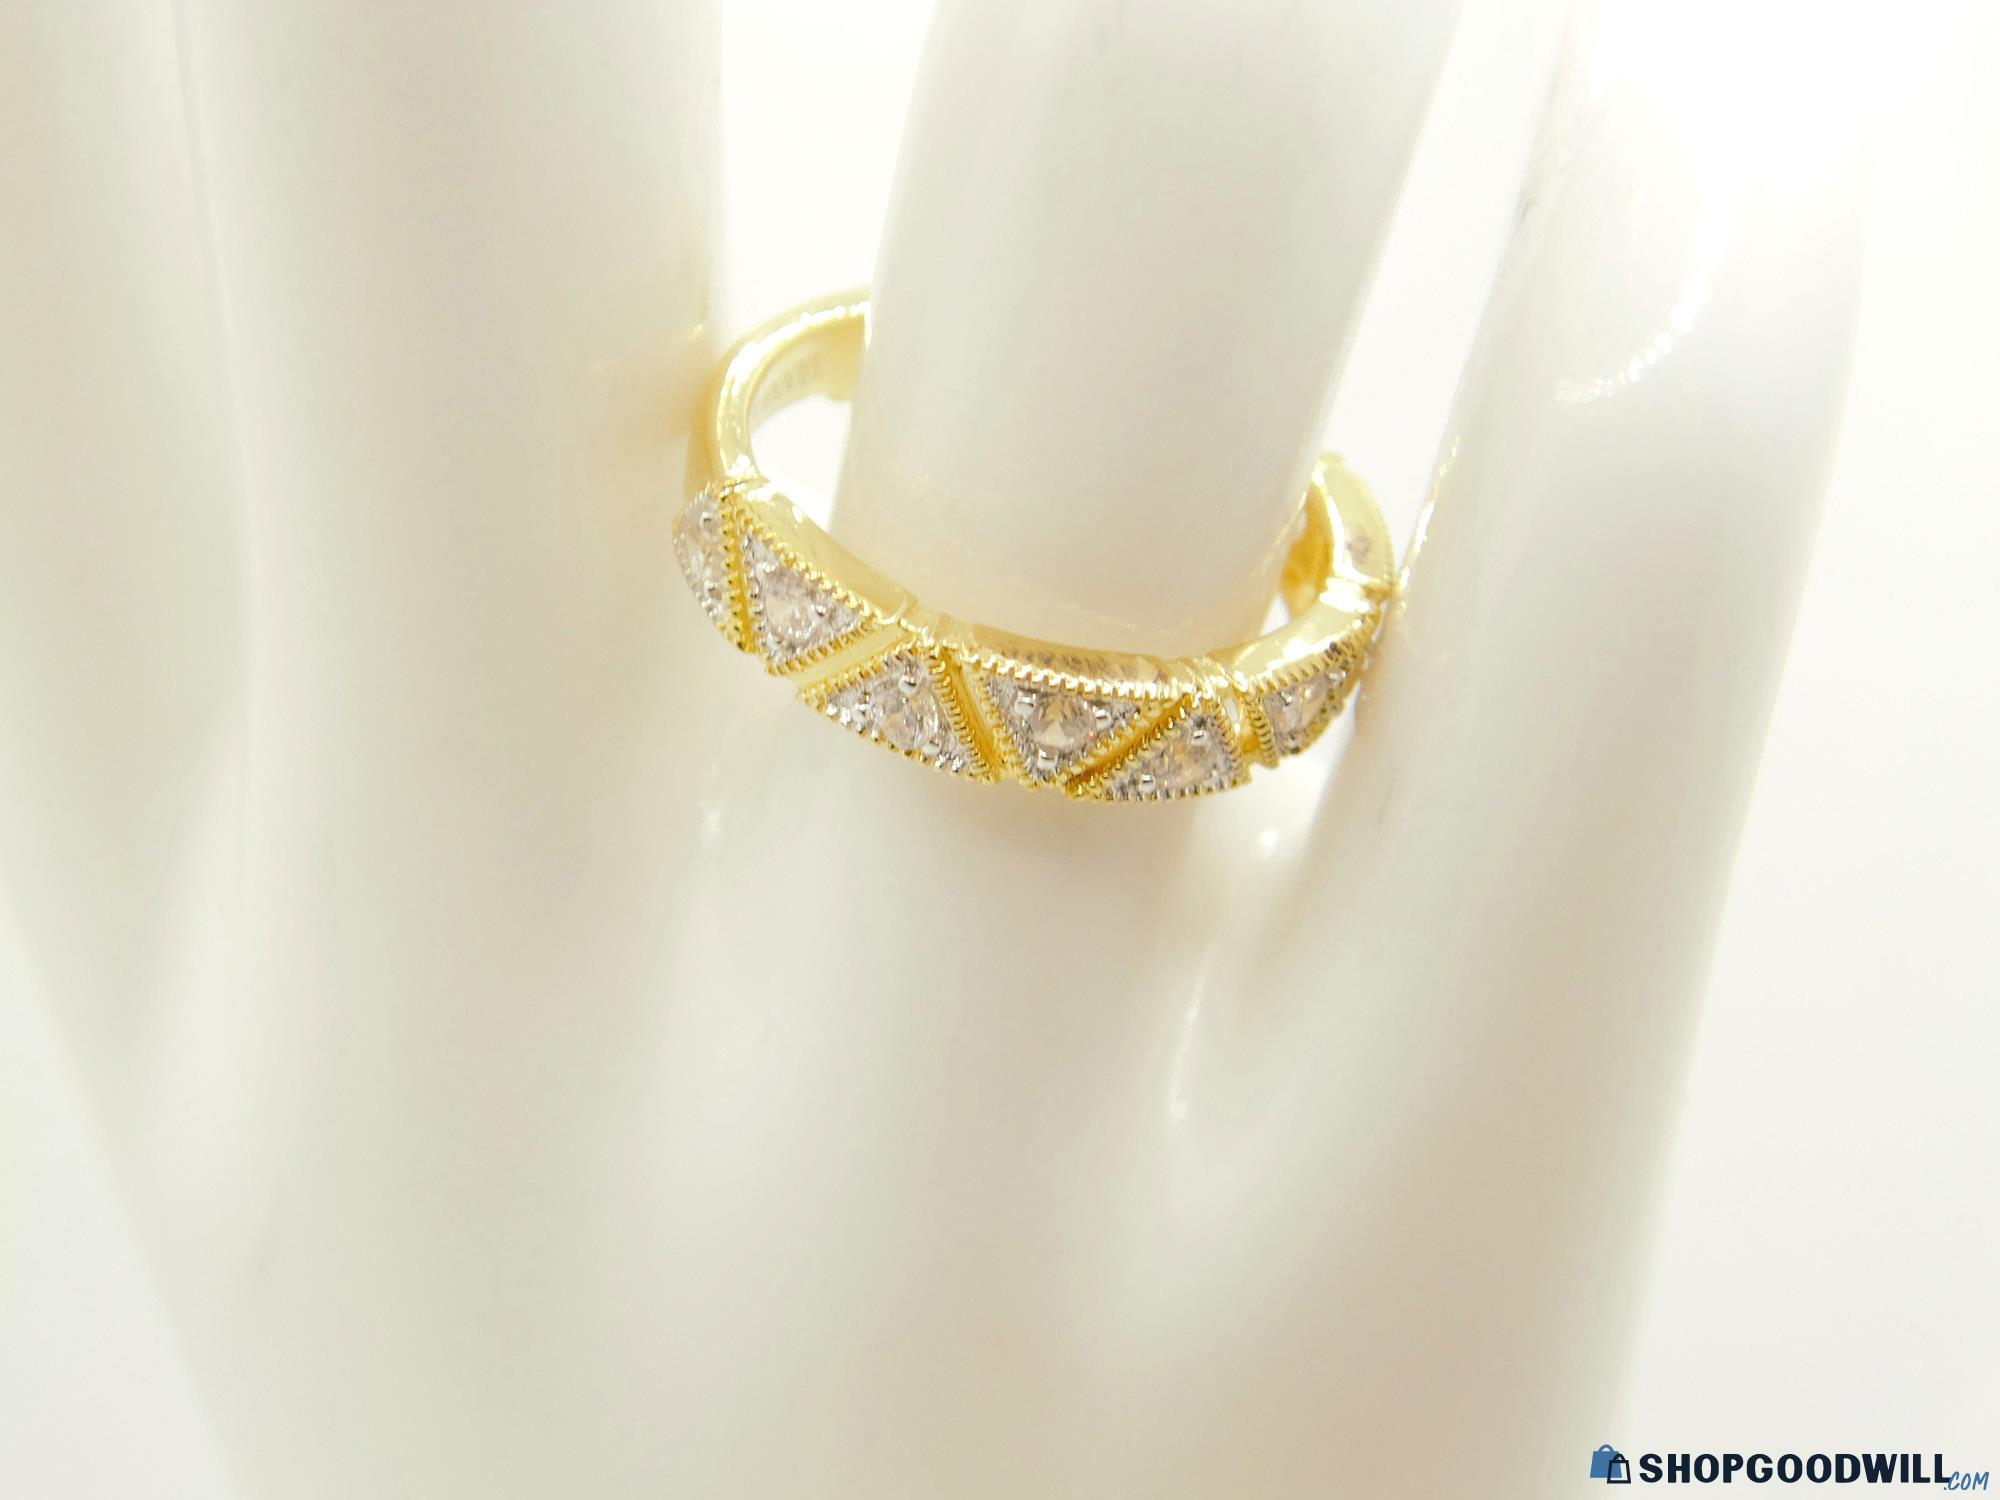

----------------------------------------------------------------------

Product: 10k yellow gold 6.75in textured bar link bracelet 5.0g
Current Price: $24.99
Predicted Price: $302.58
Potential Profit: $277.59
Category: Jewelry & Gemstones
Location: OH

Description:
material & karats (if applicable): gold 10k - tested weight(grams): 5.0g condition: fair - items show significant signs of wear such has scratches, color loss, tarnishing and missing stones. length (i...


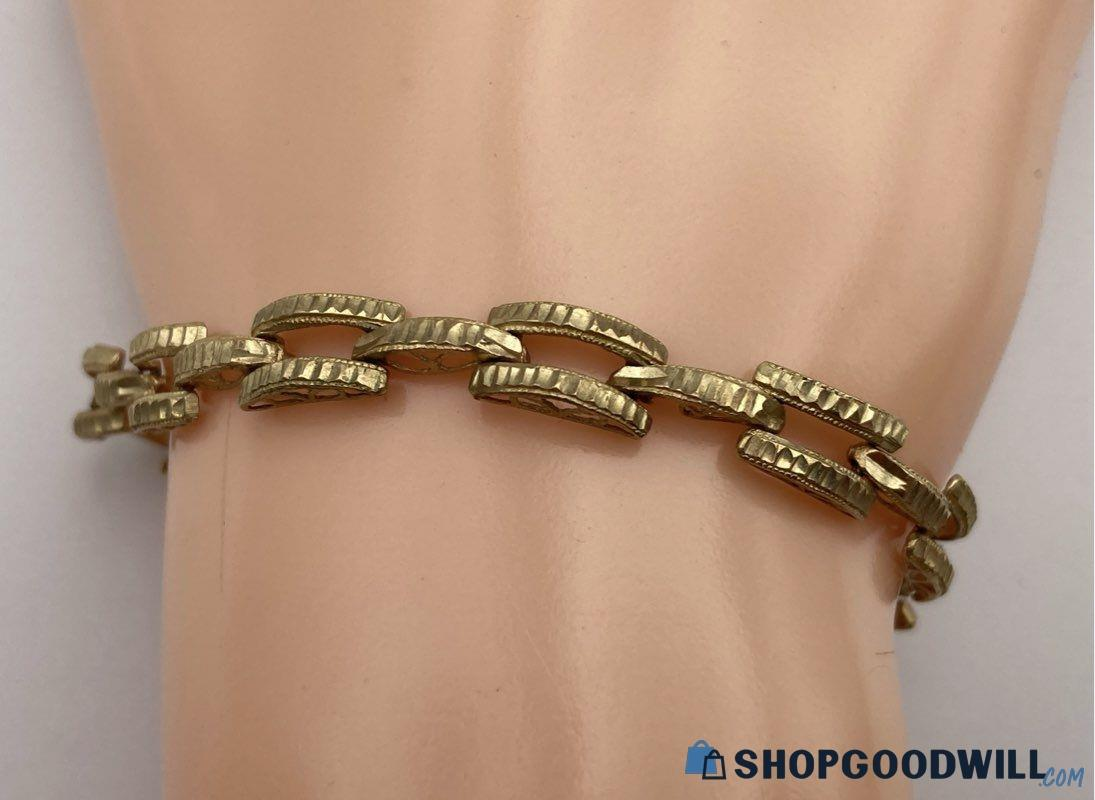

----------------------------------------------------------------------

Product: 7.9g 925 14k gold plated 3 stone lemon ice w/simulated diamond (cz) ring size 7
Current Price: $51.99
Predicted Price: $327.36
Potential Profit: $275.37
Category: Jewelry & Gemstones
Location: OH

Description:
newark ohio goodwill 2 go presents: 7.9g 925 14k gold plated 3 stone lemon ice w/simulated diamond (cz) ring size 7lemon ice measures approx 11.08mm x 10.10mm material/metal: sterling silver; 14k gold...


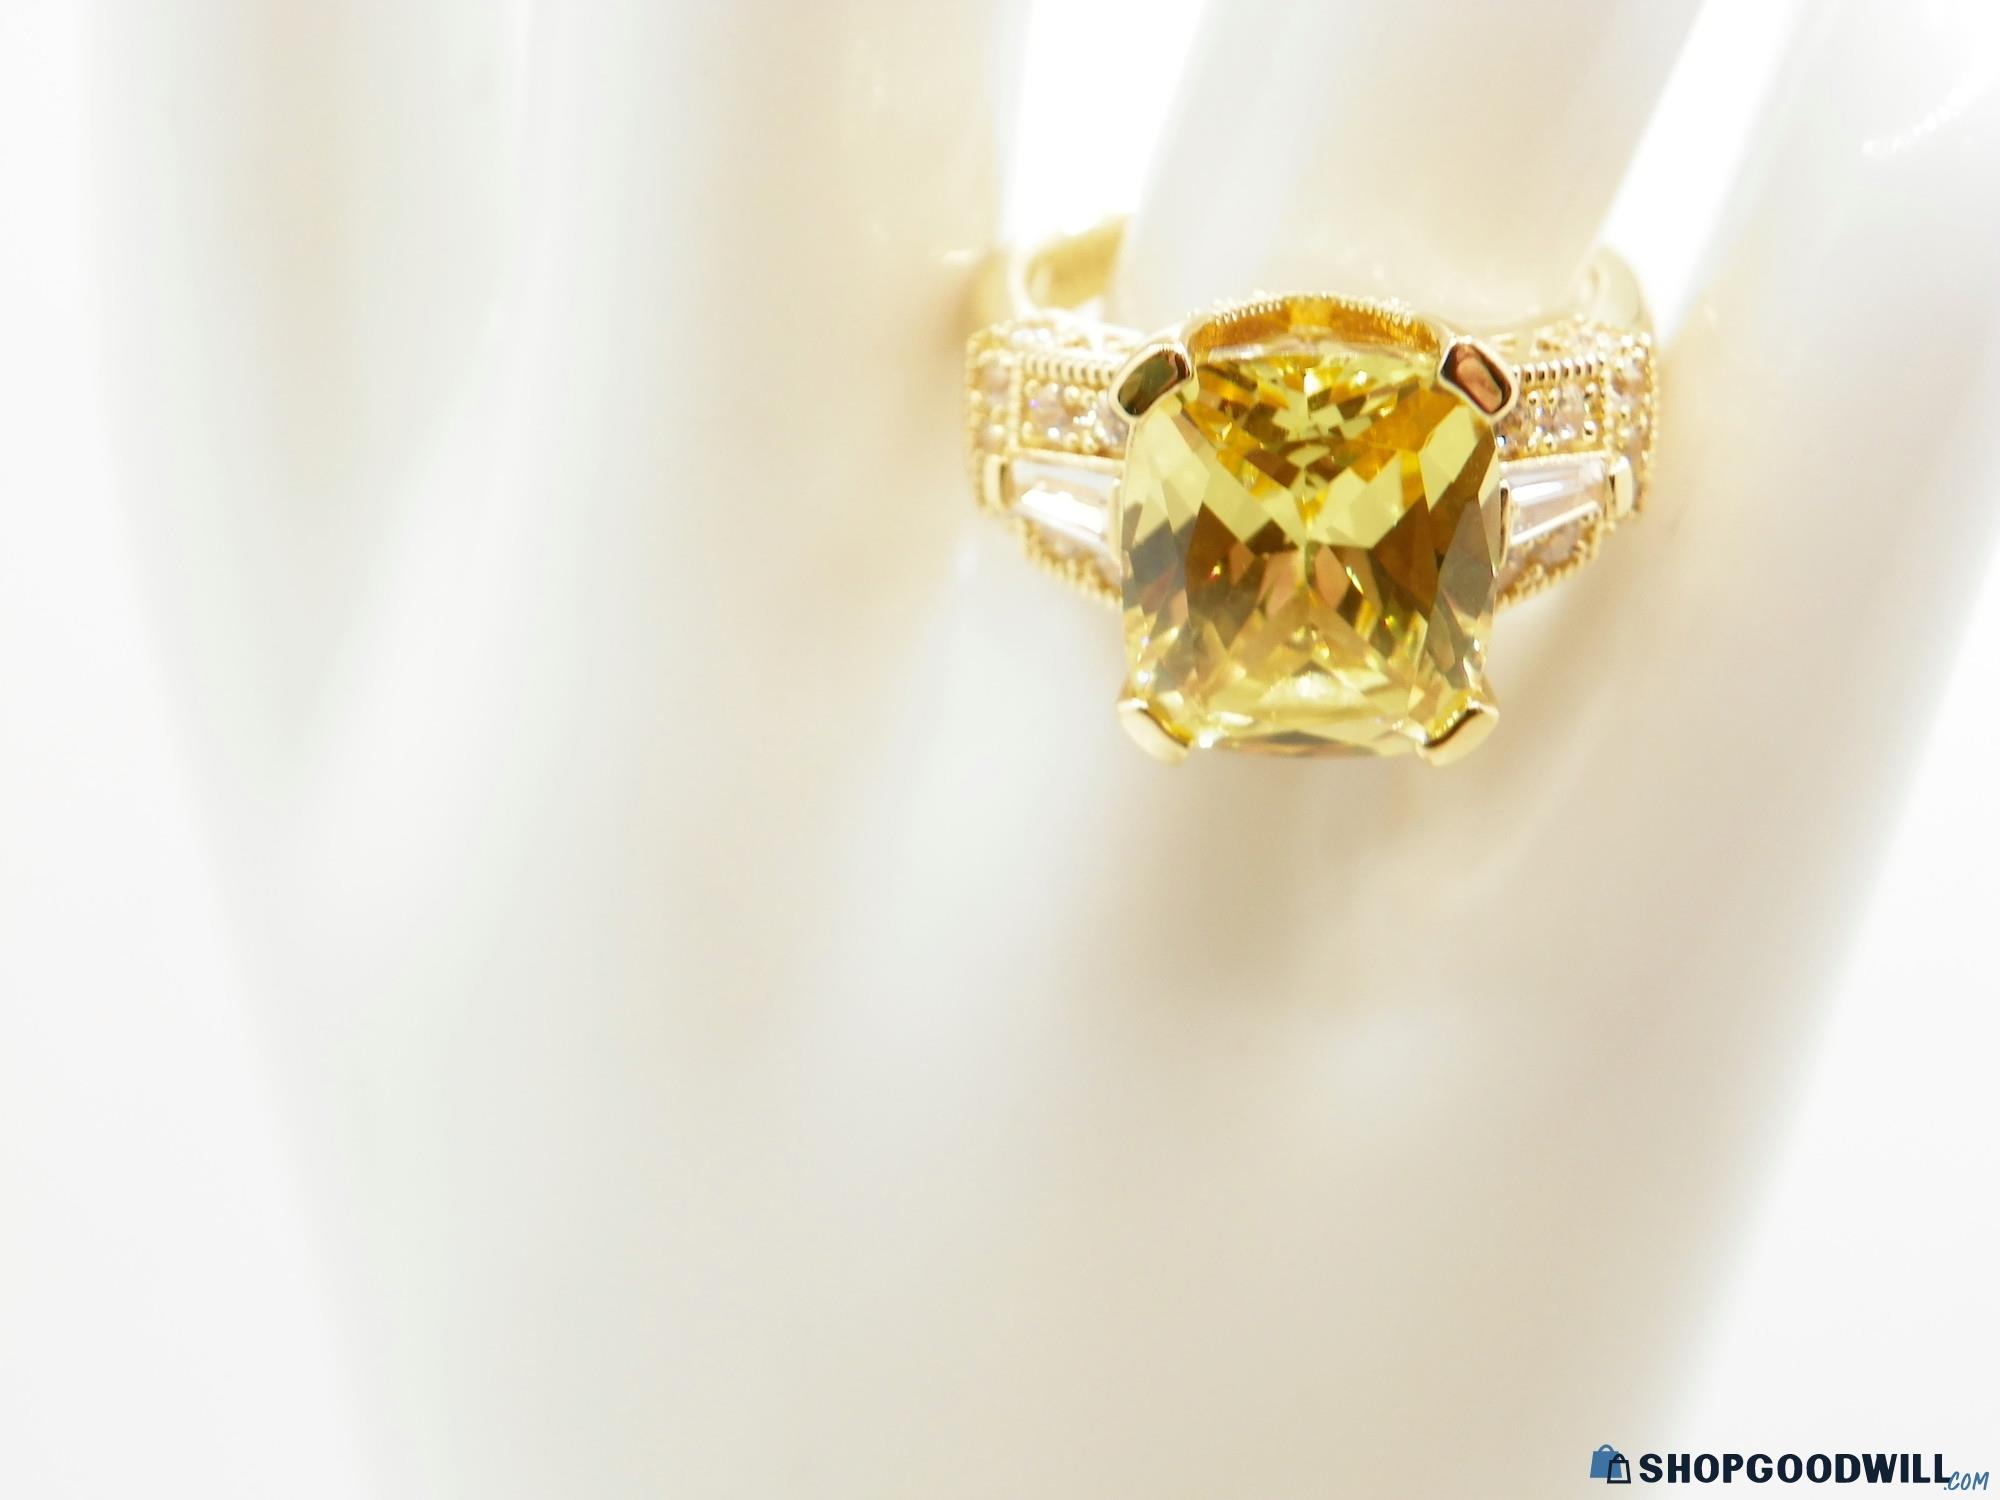

----------------------------------------------------------------------

Product: 7.9g 925 14k gold plated 3 stone lemon ice w/simulated diamond (cz) ring size 7
Current Price: $51.99
Predicted Price: $327.36
Potential Profit: $275.37
Category: Jewelry & Gemstones
Location: OH

Description:
newark ohio goodwill 2 go presents: 7.9g 925 14k gold plated 3 stone lemon ice w/simulated diamond (cz) ring size 7lemon ice measures approx 11.08mm x 10.10mm material/metal: sterling silver; 14k gold...


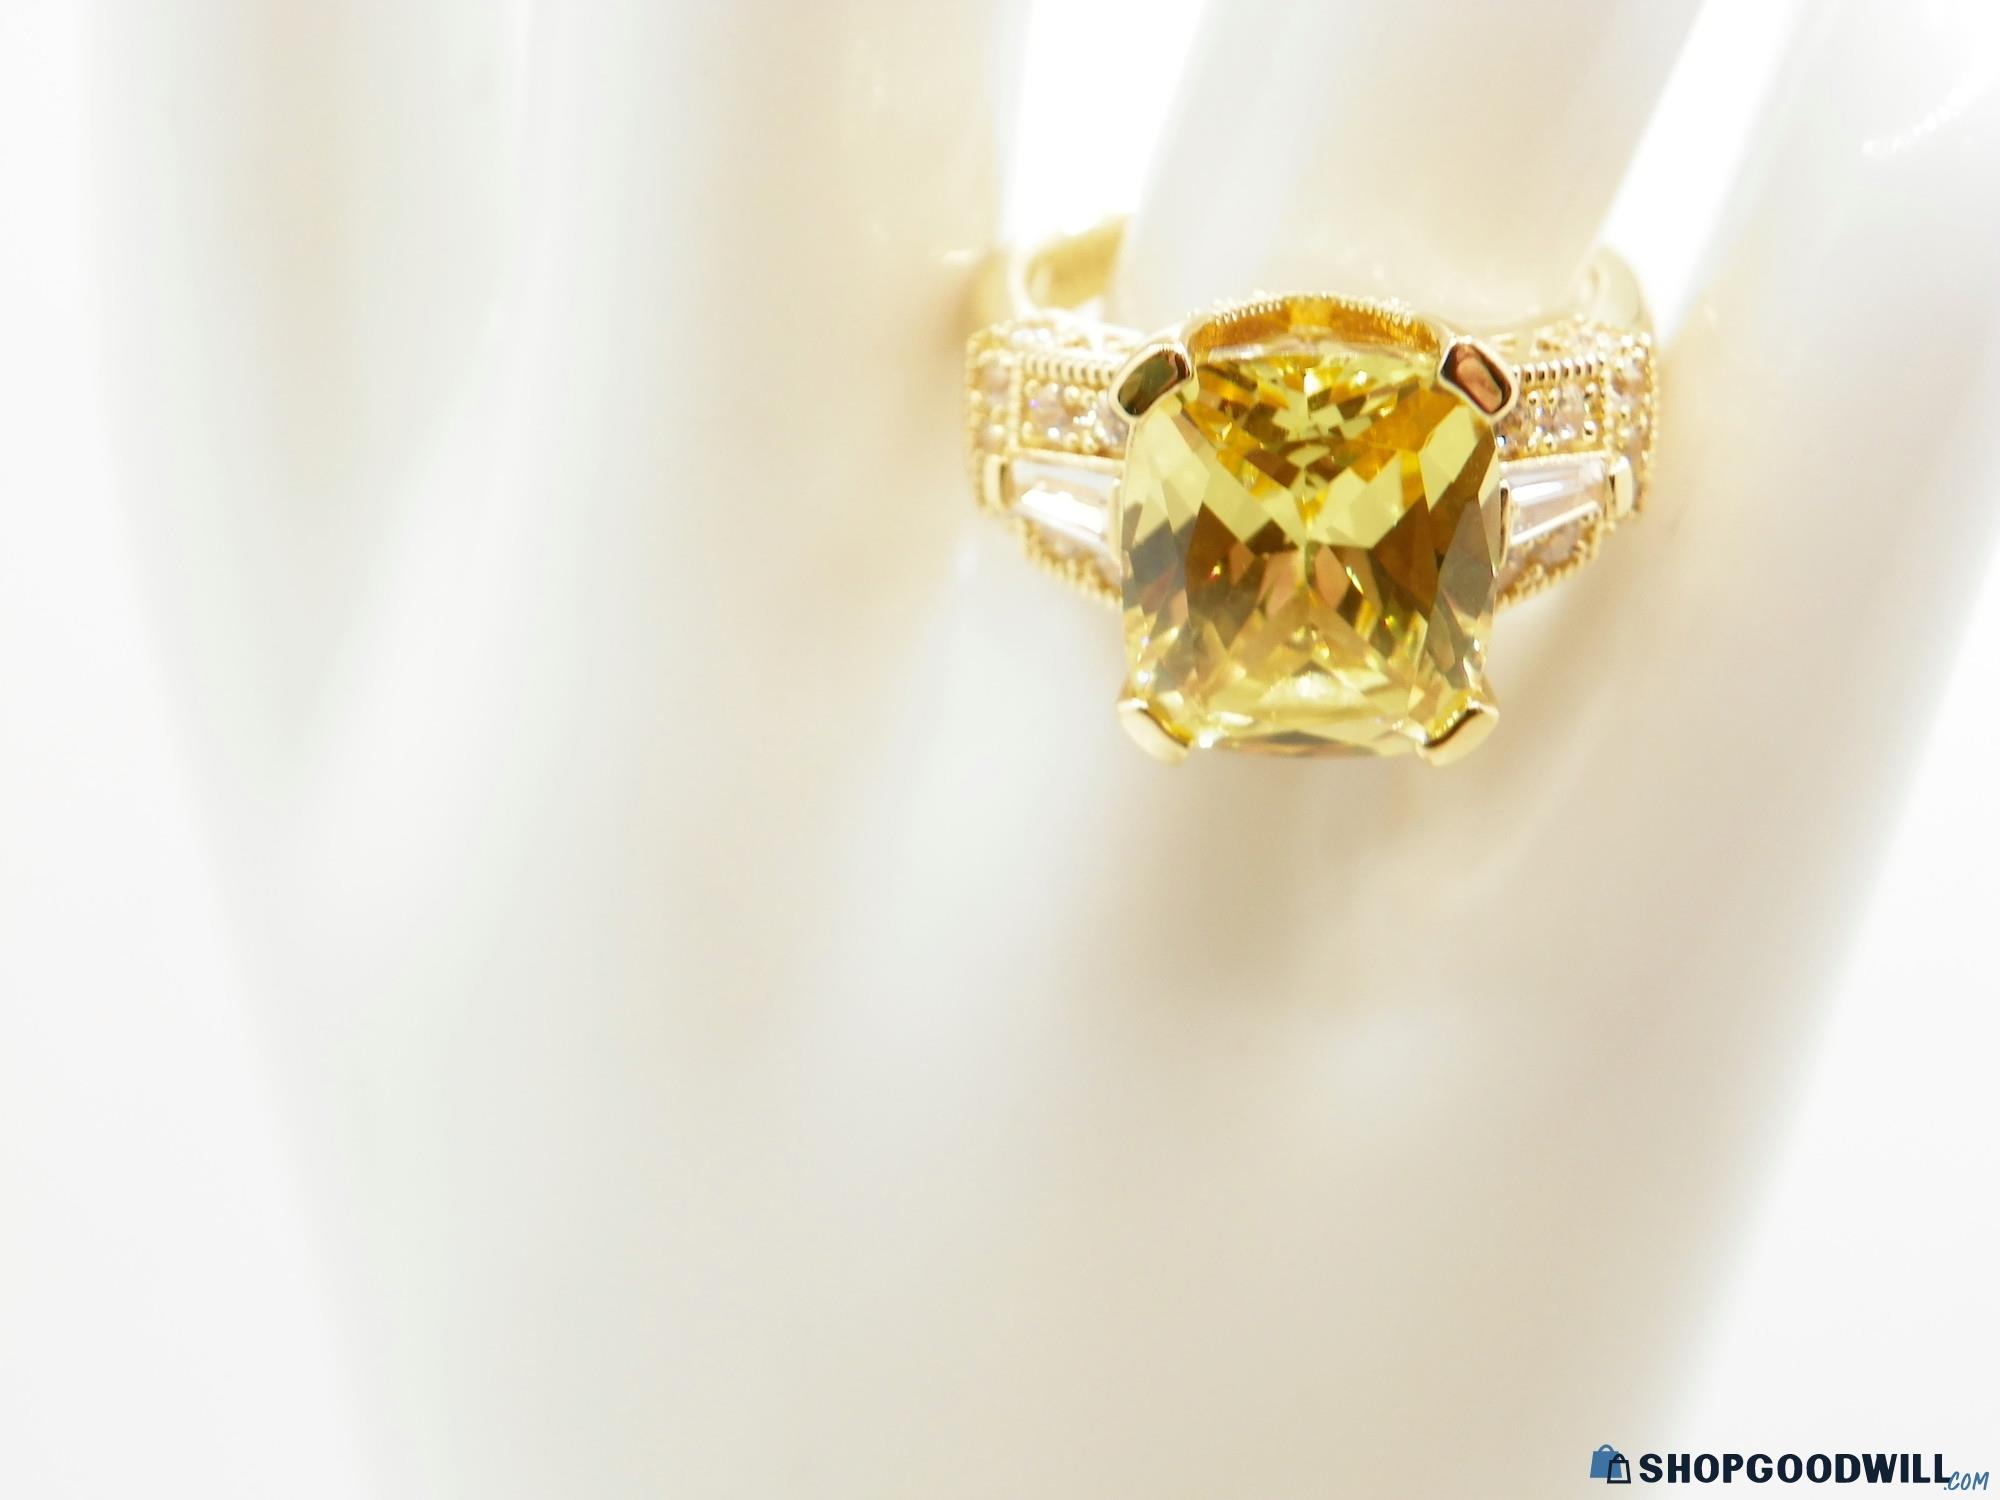

----------------------------------------------------------------------


In [6]:
print("\nTop 10 Most Promising Products:")
for idx, row in best_deals.head(10).iterrows():
    print(f"\nProduct: {row['title']}")
    print(f"Current Price: ${row['actual_price']:.2f}")
    print(f"Predicted Price: ${row['predicted_price']:.2f}")
    print(f"Potential Profit: ${row['price_difference']:.2f}")
    print(f"Category: {row['mainCategory']}")
    print(f"Location: {row['pickupState']}")
    print("\nDescription:")
    print(row['description'][:200] + "..." if len(row['description']) > 200 else row['description'])
    
    # Handle single image URL
    try:
        if pd.notna(row['imageUrls']):  # Check if URL is not NaN
            response = requests.get(row['imageUrls'])
            image_data = response.content  # Get the raw bytes
            img = Image(data=image_data)  # Pass the bytes directly to Image
            display(img)
    except Exception as e:
        print(f"Unable to display image: {e}")
        print(f"Image URL: {row['imageUrls']}")  # Print URL for debugging
    print("-" * 70)

In [7]:
top_deals = best_deals[['title', 'mainCategory', 'actual_price', 'predicted_price', 
                       'price_difference', 'price_difference_pct', 'description']]
top_deals

title         mainCategory  \
0  signed tiffany & co. 750 18k gold paloma picas...  Jewelry & Gemstones   
1  18k yellow gold 1.7mm wide gucci/mariner link ...  Jewelry & Gemstones   
2           10k yellow gold wedding ring size 6 1.2g  Jewelry & Gemstones   
3  5.32 grams of marked and tested 18k yellow gol...  Jewelry & Gemstones   
4            14k yellow gold box chain necklace 1.1g  Jewelry & Gemstones   
5  14k yellow gold 6.75in heart link chain bracel...  Jewelry & Gemstones   
6  3.0g designer vanna k 925 14k gold plated simu...  Jewelry & Gemstones   
7  10k yellow gold 6.75in textured bar link brace...  Jewelry & Gemstones   
8  7.9g 925 14k gold plated 3 stone lemon ice w/s...  Jewelry & Gemstones   
9  7.9g 925 14k gold plated 3 stone lemon ice w/s...  Jewelry & Gemstones   

   actual_price  predicted_price  price_difference  price_difference_pct  \
0        180.99          1021.34            840.35                 82.28   
1        126.00           555.95            429.95                 77.34   
2         29.99           370.13            340.14                 91.90   
3        201.00           506.87            305.87                 60.34   
4         12.99           313.09            300.10                 95.85   
5         31.00           318.21            287.21                 90.26   
6         19.99           298.20            278.21                 93.30   
7         24.99           302.58            277.59                 91.74   
8         51.99           327.36            275.37                 84.12   
9         51.99           327.36            275.37                 84.12   

                                         description  
0  tiffany & co. 18k gold brooch material & karat...  
1  18k yellow gold 1.7mm wide gucci/mariner link ...  
2  10k yellow gold wedding ring size 6 1.2g condi...  
3  brands/markings:5.32 grams of marked and teste...  
4  tested: yes material: gold gold color: yellow ...  
5  material & karats (if applicable): gold 14k - ...  
6  newark ohio goodwill 2 go presents: 3.0g desig...  
7  material & karats (if applicable): gold 10k - ...  
8  newark ohio goodwill 2 go presents: 7.9g 925 1...  
9  newark ohio goodwill 2 go presents: 7.9g 925 1...

In [8]:
# Filter for undervalued products (predicted price > actual price)
undervalued_df = df[df['predicted_price'] > df['actual_price']]

# Calculate category statistics
category_stats = pd.DataFrame({
    'total_products': df.groupby('mainCategory').size(),
    'undervalued_products': undervalued_df.groupby('mainCategory').size(),
    'avg_price_difference': undervalued_df.groupby('mainCategory')['price_difference'].mean(),
    'avg_price_difference_pct': undervalued_df.groupby('mainCategory')['price_difference_pct'].mean(),
    'total_potential_profit': undervalued_df.groupby('mainCategory')['price_difference'].sum()
}).reset_index()

# Calculate normalized profitability score
category_stats['profit_per_product'] = category_stats['total_potential_profit'] / category_stats['total_products']
category_stats['undervalued_ratio'] = category_stats['undervalued_products'] / category_stats['total_products']

# Get top 10 categories by profit per product
top_categories = category_stats.nlargest(10, 'profit_per_product')
top_categories

mainCategory  total_products  undervalued_products  \
14      Jewelry & Gemstones           11758                  8789   
4                      Bulk             335                   258   
12   Gaming Systems & Games            4108                  3013   
17      Musical Instruments            1301                   926   
5      Cameras & Camcorders            2234                  1535   
9   Computers & Electronics            5916                  4055   
21      Science & Education             190                   134   
25                    Tools             391                   282   
1                       Art            2445                  1493   
18          Office Supplies             410                   225   

    avg_price_difference  avg_price_difference_pct  total_potential_profit  \
14             15.680484                 40.832109               137815.77   
4              14.067868                 43.813450                 3629.51   
12             11.011397                 42.030840                33177.34   
17             10.371847                 39.794352                 9604.33   
5               8.888782                 36.066352                13644.28   
9               7.062400                 35.635083                28638.03   
21              6.120075                 35.733134                  820.09   
25              5.869645                 34.010035                 1655.24   
1               6.010255                 34.281092                 8973.31   
18              6.597200                 34.844311                 1484.37   

    profit_per_product  undervalued_ratio  
14           11.721021           0.747491  
4            10.834358           0.770149  
12            8.076276           0.733447  
17            7.382267           0.711760  
5             6.107556           0.687108  
9             4.840776           0.685429  
21            4.316263           0.705263  
25            4.233350           0.721228  
1             3.670065           0.610634  
18            3.620415           0.548780


Most Profitable Categories (Normalized by Product Count):

Category: Jewelry & Gemstones
Category Statistics:
Total Products: 11758
Undervalued Products: 8789
Average Profit per Product: $11.72
Undervalued Ratio: 74.7%

Best Product in Category:
Product: signed tiffany & co. 750 18k gold paloma picasso love & kisses xxxooo brooch
Current Price: $180.99
Predicted Price: $1021.34
Price Difference: $840.35
Percentage Difference: 82.3%
Location: GA

Description:
tiffany & co. 18k gold brooch material & karats (if applicable): gold 18k weight: 4.26 grams condition: good - shows some sign of wear


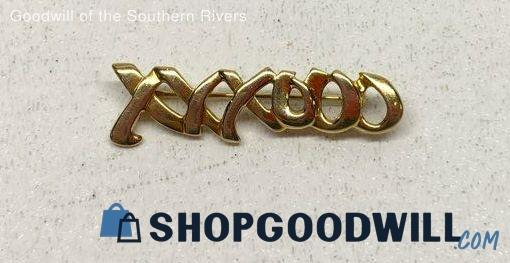

----------------------------------------------------------------------

Category: Bulk
Category Statistics:
Total Products: 335
Undervalued Products: 258
Average Profit per Product: $10.83
Undervalued Ratio: 77.0%

Best Product in Category:
Product: bulk fashion & bohemian w/designer names jewelry box - 17.4 lbs.
Current Price: $12.99
Predicted Price: $128.13
Price Difference: $115.14
Percentage Difference: 89.9%
Location: AZ

Description:
bulk fashion & bohemian w/designer names jewelry box - 17.4 lbs. box may include one or more pieces from designer/name brands such as chico’s, j. crew, kate spade, ann taylor, various nordstrom brands...


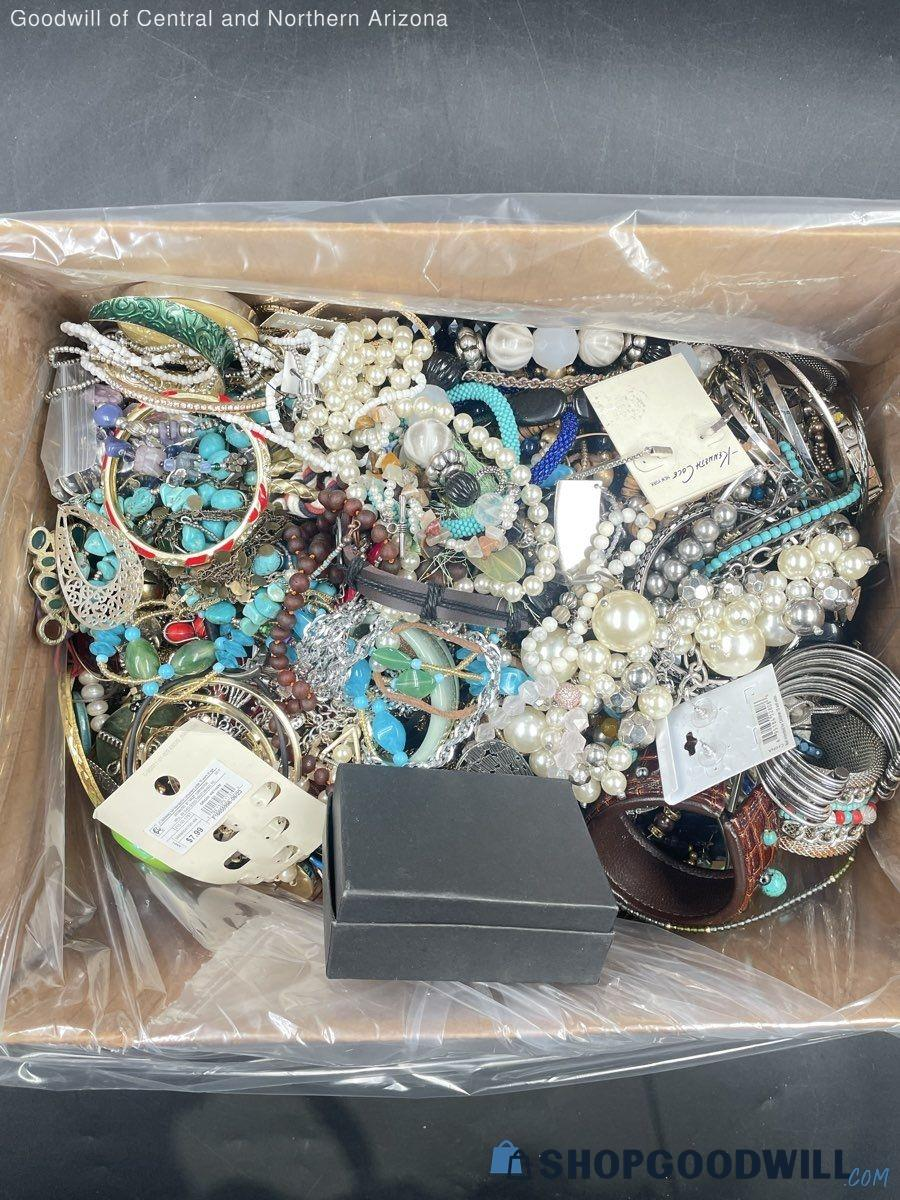

----------------------------------------------------------------------

Category: Gaming Systems & Games
Category Statistics:
Total Products: 4108
Undervalued Products: 3013
Average Profit per Product: $8.08
Undervalued Ratio: 73.3%

Best Product in Category:
Product: sony playstation 2 ps2 lot - 2 consoles, 1 controller & 1 power cord (power on)
Current Price: $10.00
Predicted Price: $125.74
Price Difference: $115.74
Percentage Difference: 92.0%
Location: OR

Description:
sony playstation 2 ps2 lot - 2 consoles, 1 controller & 1 power cord (power on).condition: both consoles power on with green lights. no further testing done. may not work as intended. controller is no...


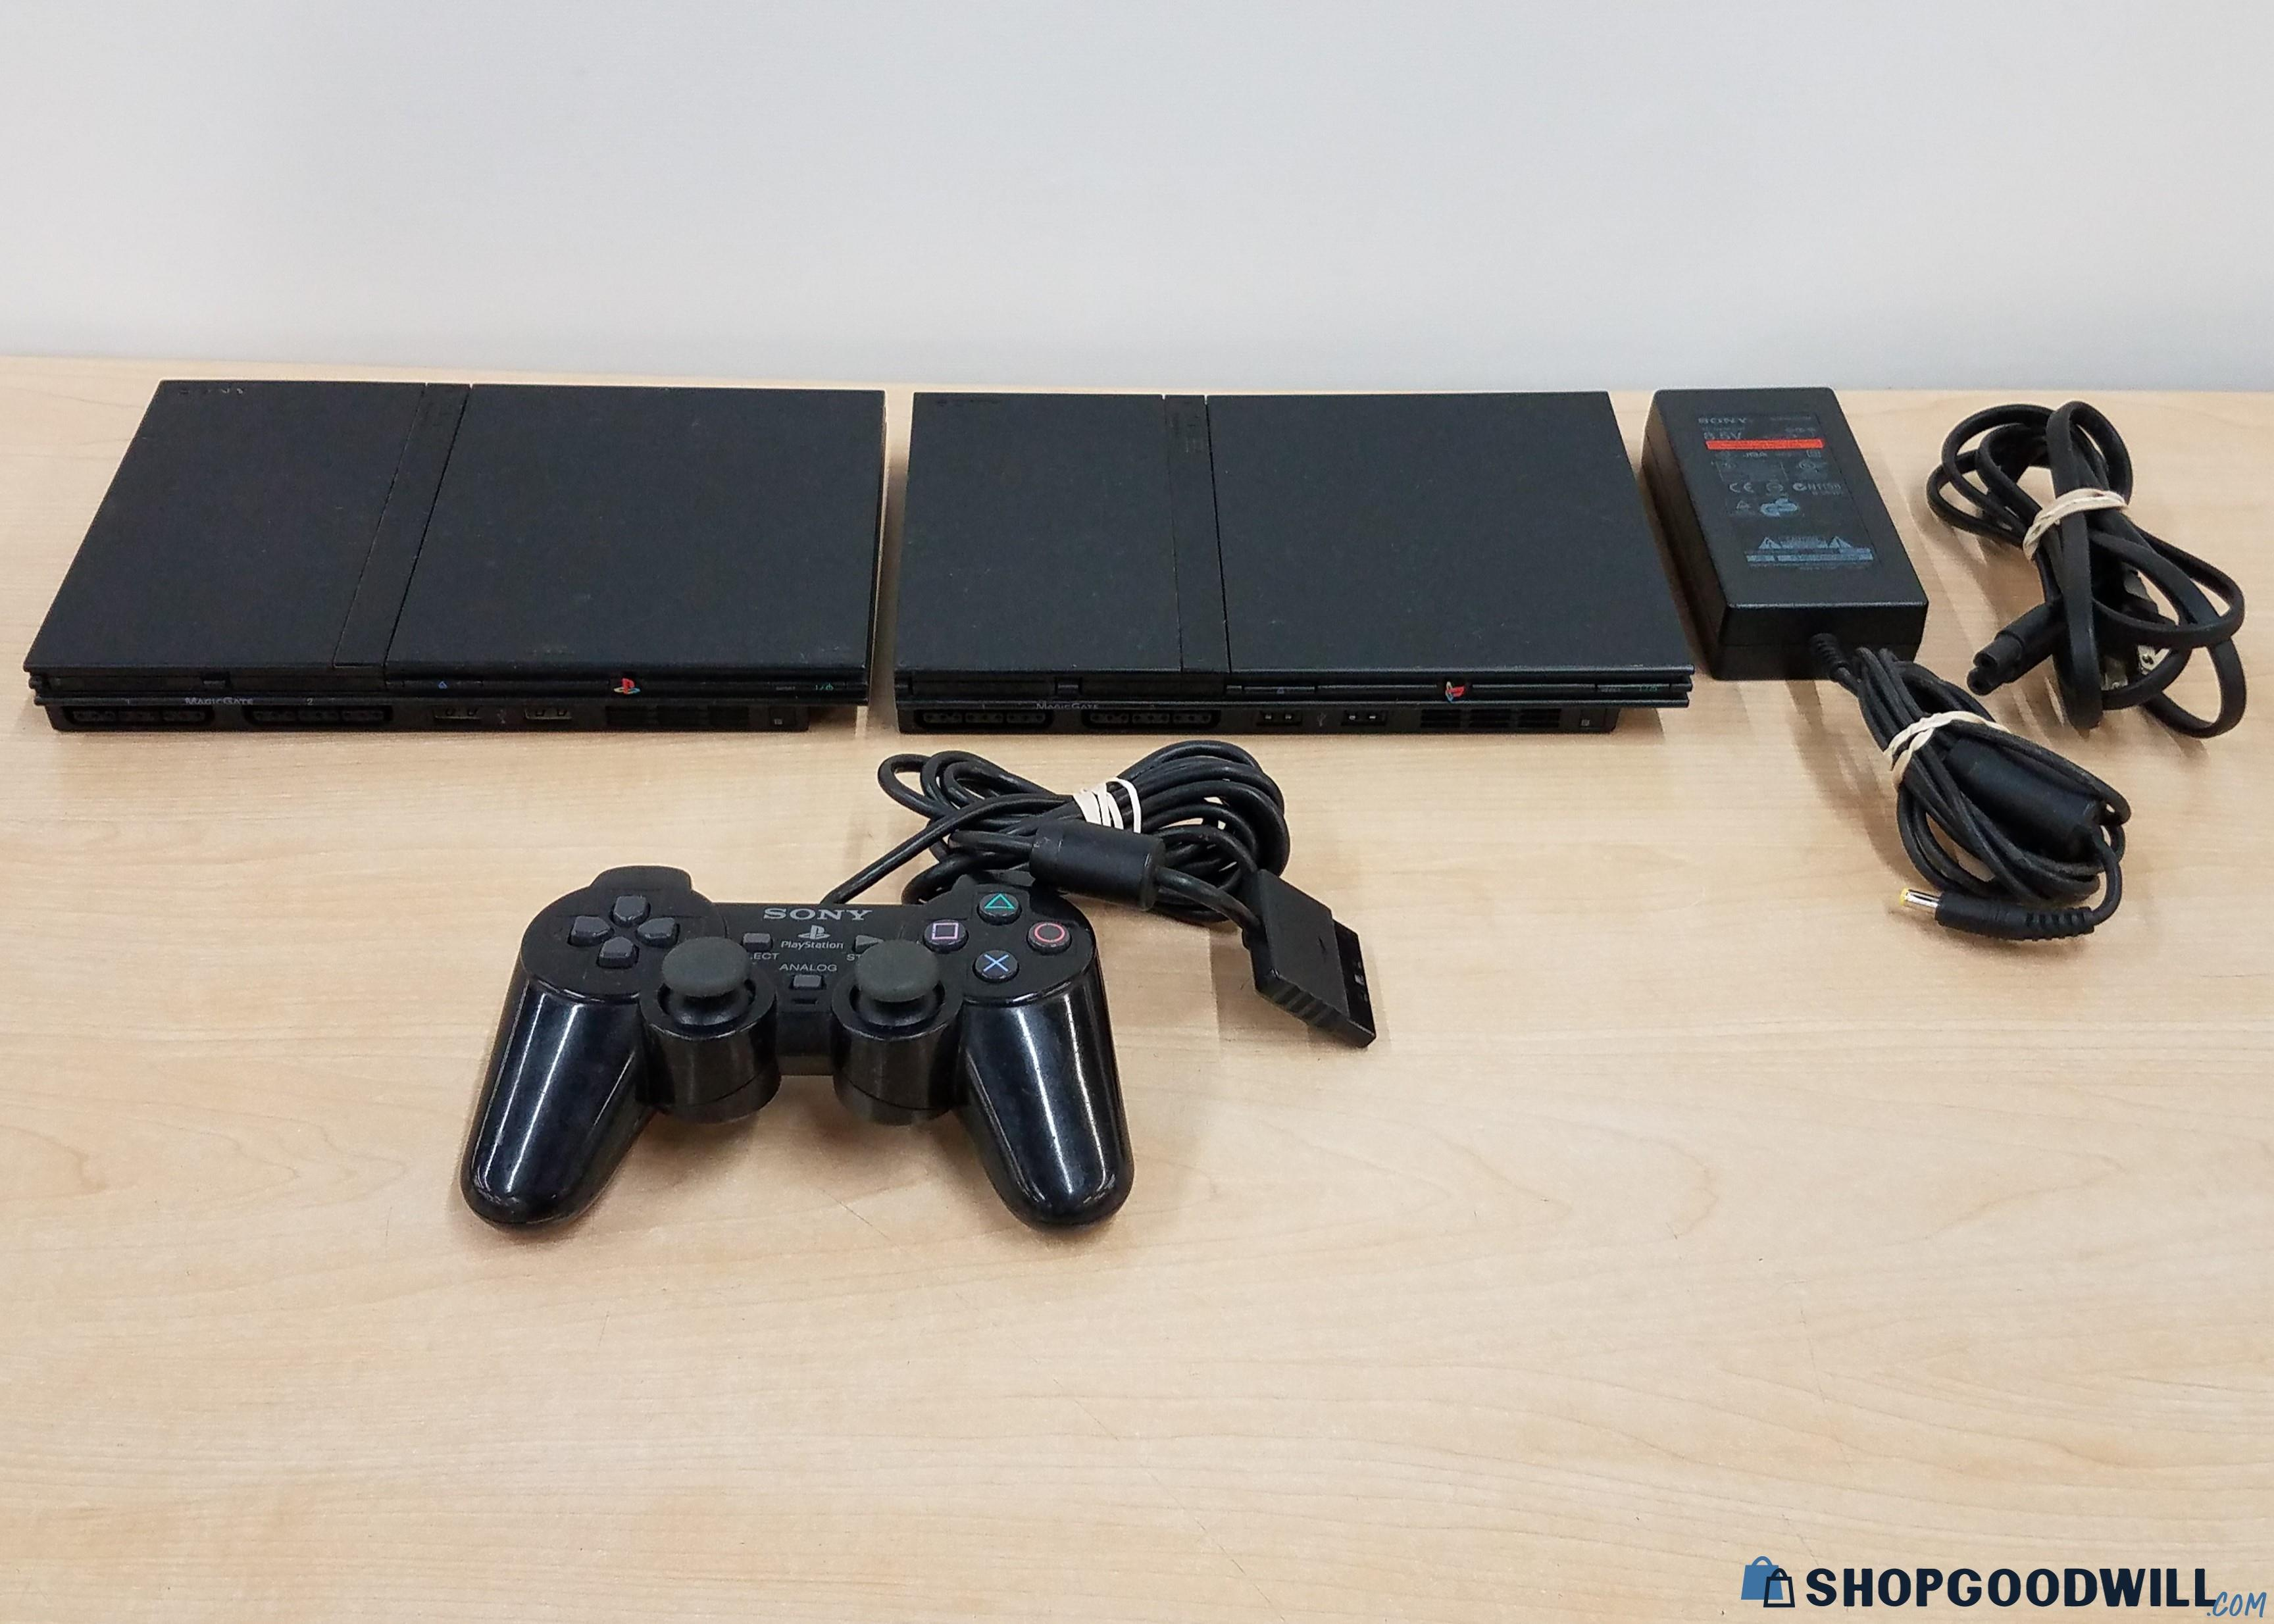

----------------------------------------------------------------------

Category: Musical Instruments
Category Statistics:
Total Products: 1301
Undervalued Products: 926
Average Profit per Product: $7.38
Undervalued Ratio: 71.2%

Best Product in Category:
Product: vtg wooden oud 11 string folk musical instrument w/ protective leather case
Current Price: $11.00
Predicted Price: $110.32
Price Difference: $99.32
Percentage Difference: 90.0%
Location: IL

Description:
bidding on vtg wooden oud 11 string folk musical instrument w/ protective leather case condition: good with minor signs of use/wear/age description: as is - view pictures for additional information, m...


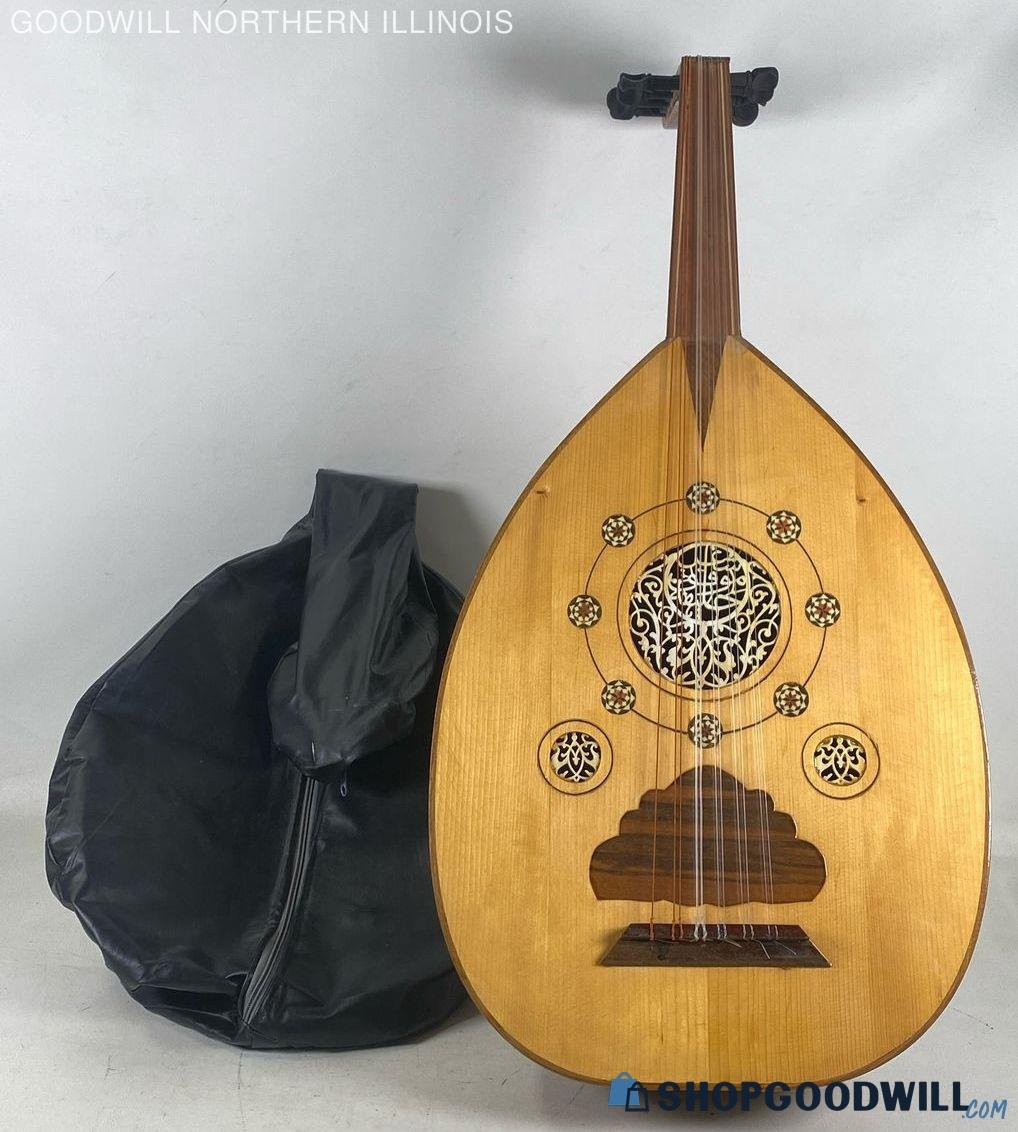

----------------------------------------------------------------------

Category: Cameras & Camcorders
Category Statistics:
Total Products: 2234
Undervalued Products: 1535
Average Profit per Product: $6.11
Undervalued Ratio: 68.7%

Best Product in Category:
Product: 28+ lbs lot of assorted digital/film cameras & camcorders for parts/repair
Current Price: $7.99
Predicted Price: $114.39
Price Difference: $106.40
Percentage Difference: 93.0%
Location: MD

Description:
28+ lbs lot of assorted digital/film cameras & camcorders for parts/repair this lot is for parts and/or repair, see condition for more details manufacturer/markings: polaroid panasonic canon albinar k...


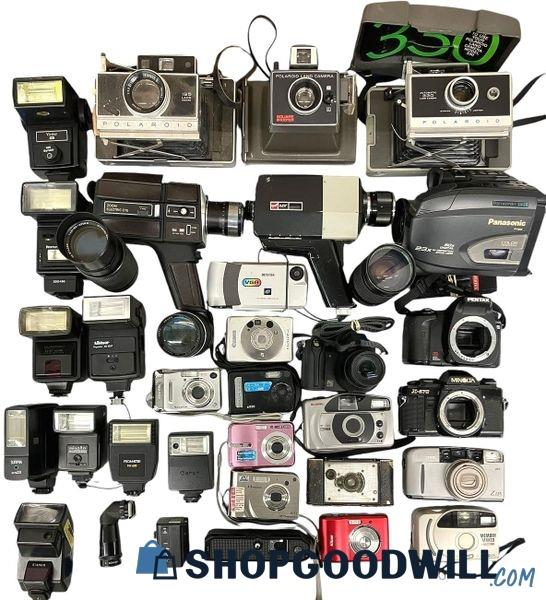

----------------------------------------------------------------------

Category: Computers & Electronics
Category Statistics:
Total Products: 5916
Undervalued Products: 4055
Average Profit per Product: $4.84
Undervalued Ratio: 68.5%

Best Product in Category:
Product: apple ipad pro 10.5" 1st gen mphg2ll/a 256gb tablet - icl - for parts only
Current Price: $14.99
Predicted Price: $109.05
Price Difference: $94.06
Percentage Difference: 86.2%
Location: NC

Description:
brand: apple model: apple ipad pro 10.5" 1st generation apple identifier: mphg2ll/a screen size: 10.5 in color: space gray storage: 256gb serial: dmpwk31vhpdv imei: 353031090141076 network: unknown ca...


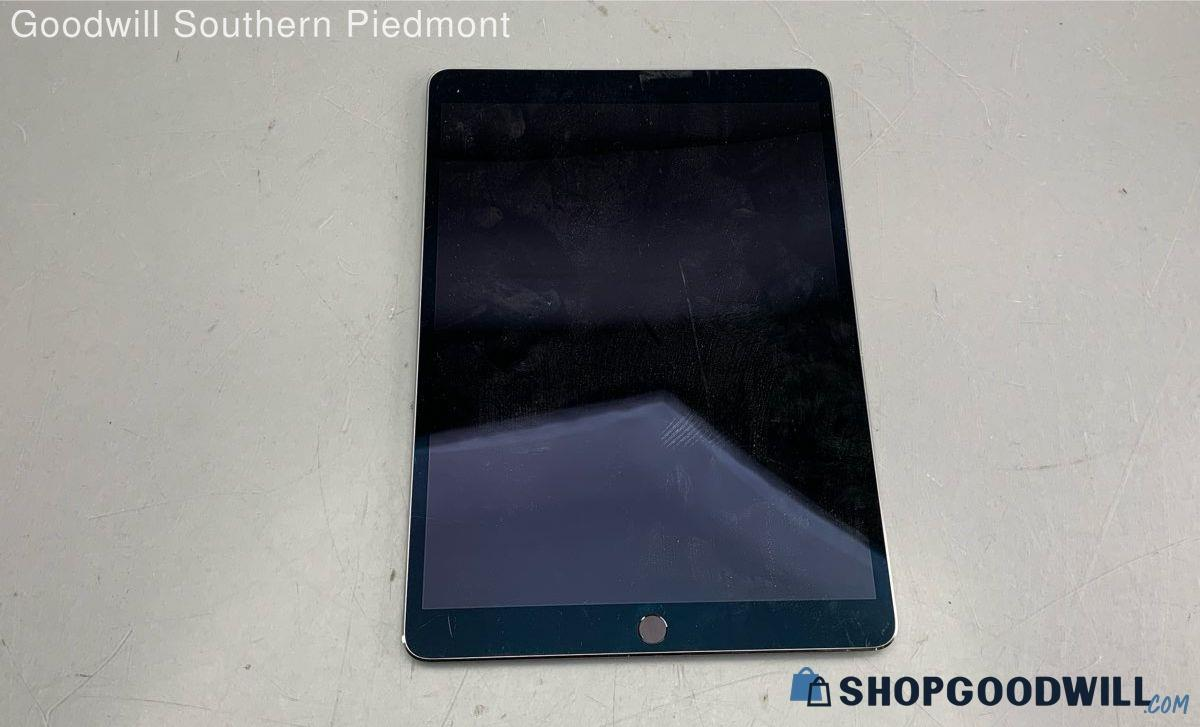

----------------------------------------------------------------------

Category: Science & Education
Category Statistics:
Total Products: 190
Undervalued Products: 134
Average Profit per Product: $4.32
Undervalued Ratio: 70.5%

Best Product in Category:
Product: galileo model cc-2 700mm x 60mm refractor telescope w/soft case
Current Price: $4.99
Predicted Price: $34.40
Price Difference: $29.41
Percentage Difference: 85.5%
Location: MD

Description:
galileo model cc-2 telescope. objective lens diameter: 700mm-60mm. lens coating: multi-coated. type: refractor. measures: 33" x 29" condition: this item is in good used condition. please see images.


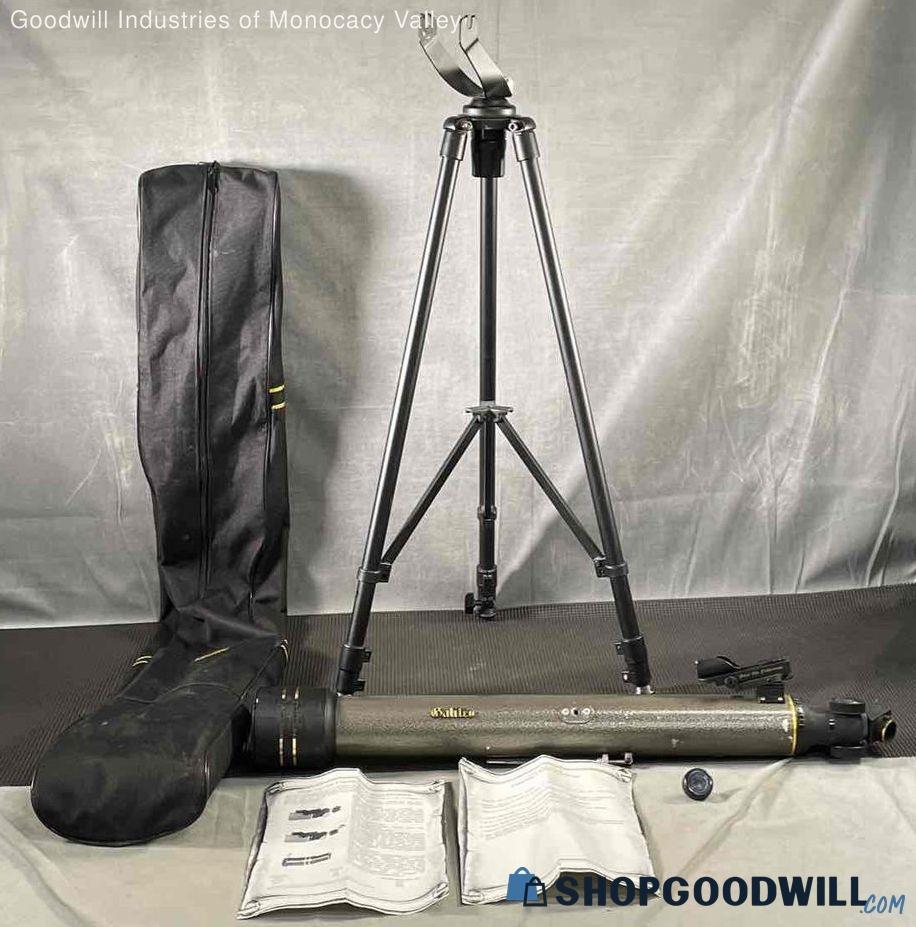

----------------------------------------------------------------------

Category: Tools
Category Statistics:
Total Products: 391
Undervalued Products: 282
Average Profit per Product: $4.23
Undervalued Ratio: 72.1%

Best Product in Category:
Product: dewalt dc930 xrp cordless drill/driver w/ battery packs & battery charger
Current Price: $19.99
Predicted Price: $54.38
Price Difference: $34.39
Percentage Difference: 63.2%
Location: OR

Description:
pickup is not available, please utilize the shipping calculator prior to bidding battery included:yesvoltage:14.4 vdescription:dewalt dc930 xrp cordless drill/driver w/ battery packs & battery charger...


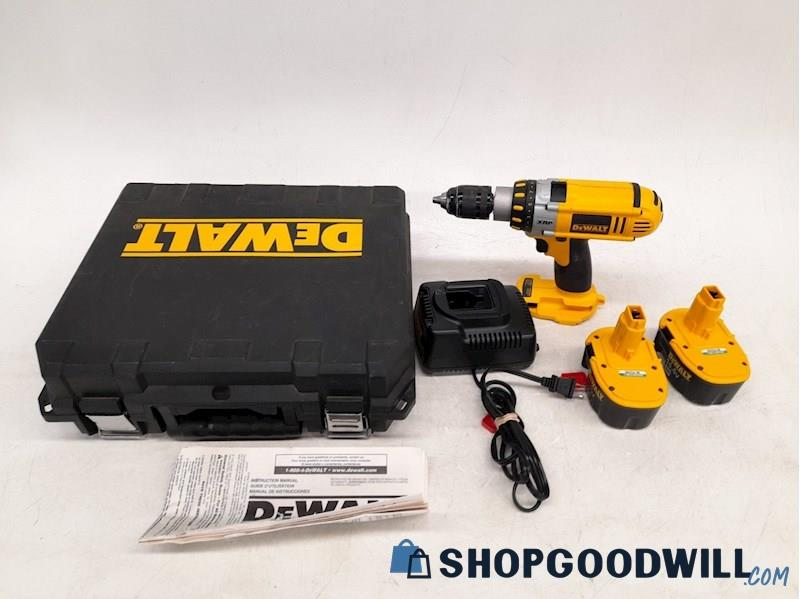

----------------------------------------------------------------------

Category: Art
Category Statistics:
Total Products: 2445
Undervalued Products: 1493
Average Profit per Product: $3.67
Undervalued Ratio: 61.1%

Best Product in Category:
Product: late century oil painting signed zwicker fauvist style tropical landscape
Current Price: $29.99
Predicted Price: $83.00
Price Difference: $53.01
Percentage Difference: 63.9%
Location: CA

Description:
period: contemporary dated: late 20th century style / movement: fauvism and folk art elements subject matter: tropical coastal landscape medium: oil on canvas signature: signed - zwicker dimensions (h...


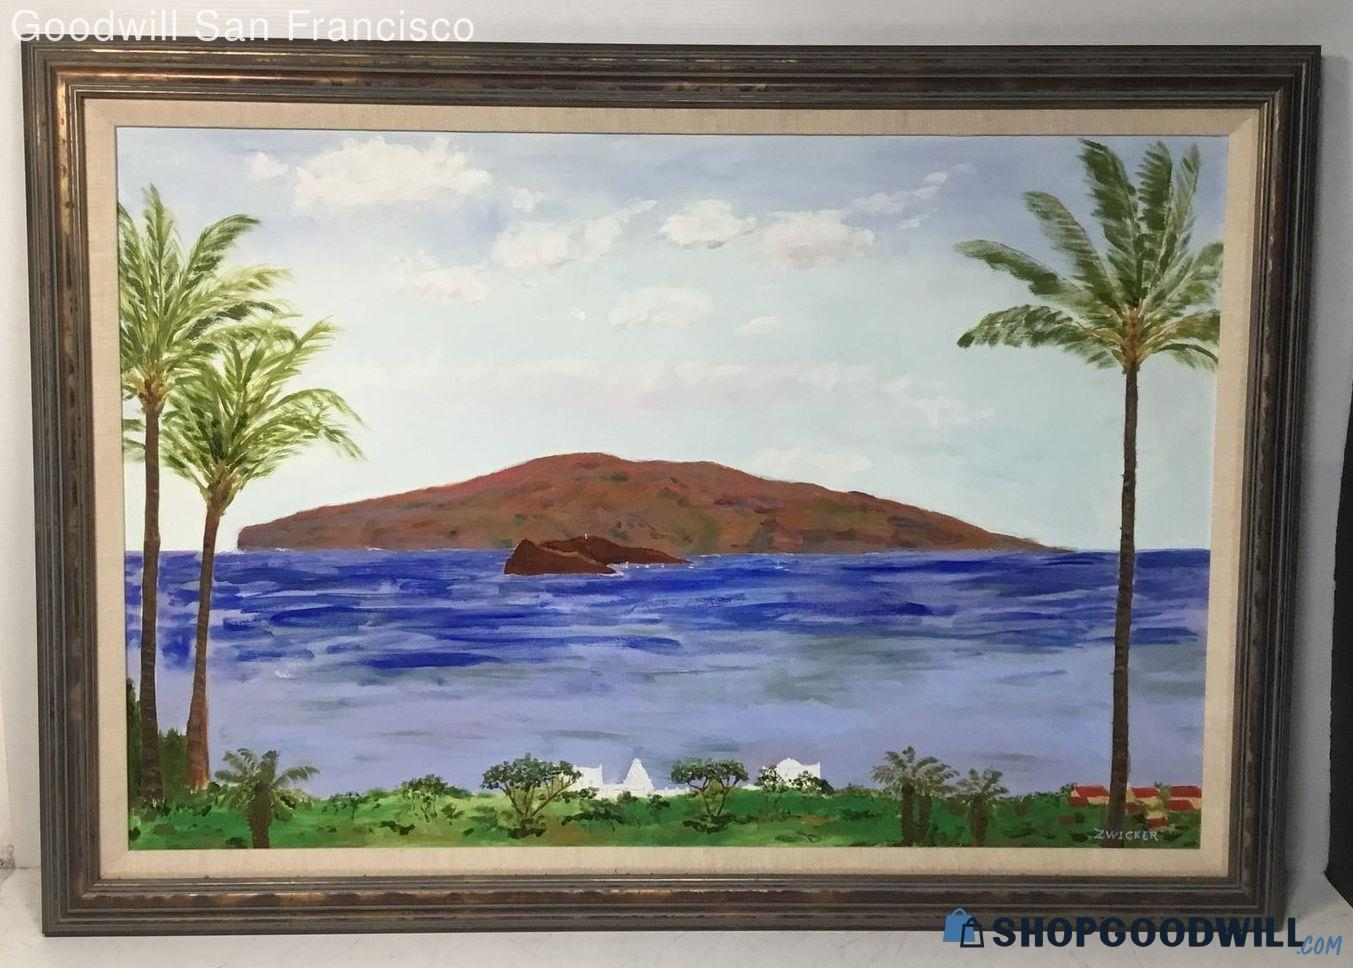

----------------------------------------------------------------------

Category: Office Supplies
Category Statistics:
Total Products: 410
Undervalued Products: 225
Average Profit per Product: $3.62
Undervalued Ratio: 54.9%

Best Product in Category:
Product: vintage smith-corona galaxy twelve typewriter with case
Current Price: $9.99
Predicted Price: $62.27
Price Difference: $52.28
Percentage Difference: 84.0%
Location: MI

Description:
description:vintage smith-corona galaxy twelve typewriter with casebrand/manufacturer: smith-corona condition:no apparent damage. not tested. sold as is.dimensions:17 1/2" x 14" x 6"


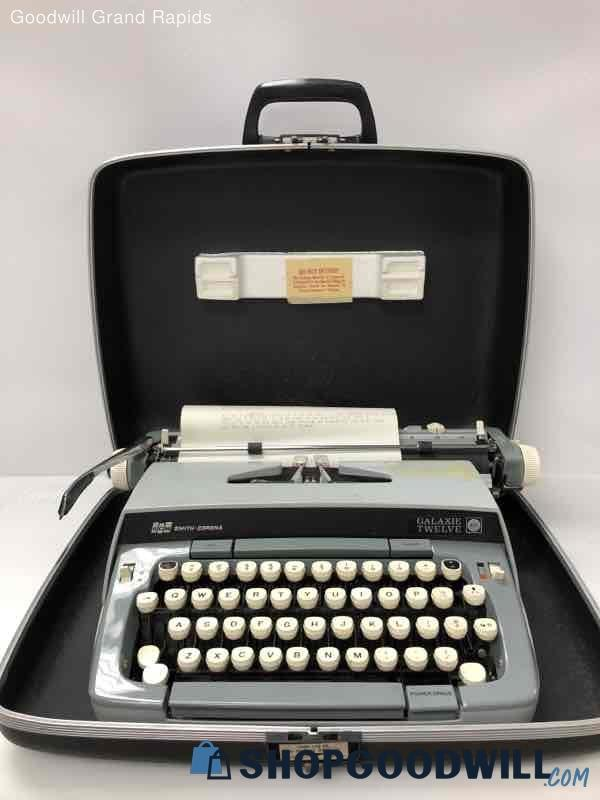

----------------------------------------------------------------------


In [9]:
# For each top category, get the most undervalued product
print("\nMost Profitable Categories (Normalized by Product Count):")
for idx, cat_row in top_categories.iterrows():
    category = cat_row['mainCategory']
    # Get the most undervalued product in this category
    best_product = undervalued_df[undervalued_df['mainCategory'] == category].nlargest(1, 'price_difference').iloc[0]
    
    print(f"\nCategory: {category}")
    print(f"Category Statistics:")
    print(f"Total Products: {cat_row['total_products']}")
    print(f"Undervalued Products: {cat_row['undervalued_products']}")
    print(f"Average Profit per Product: ${cat_row['profit_per_product']:.2f}")
    print(f"Undervalued Ratio: {cat_row['undervalued_ratio']*100:.1f}%")
    
    print(f"\nBest Product in Category:")
    print(f"Product: {best_product['title']}")
    print(f"Current Price: ${best_product['actual_price']:.2f}")
    print(f"Predicted Price: ${best_product['predicted_price']:.2f}")
    print(f"Price Difference: ${best_product['price_difference']:.2f}")
    print(f"Percentage Difference: {abs(best_product['price_difference_pct']):.1f}%")
    print(f"Location: {best_product['pickupState']}")
    
    print("\nDescription:")
    print(best_product['description'][:200] + "..." if len(best_product['description']) > 200 else best_product['description'])
    
    # Display image
    try:
        if pd.notna(best_product['imageUrls']):
            response = requests.get(best_product['imageUrls'])
            image_data = response.content
            img = Image(data=image_data)
            display(img)
    except Exception as e:
        print(f"Unable to display image: {e}")
    print("-" * 70)
